### ライブラリのImport

In [1]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### データの読み込み

In [2]:
# 画像データ
X_train = np.load('/mnt/c/Users/user/MyData/SonyDice/X_train.npy')
X_train = np.reshape(X_train, [200000, 20, 20])
X_train.shape

(200000, 20, 20)

In [3]:
X_test = np.load('/mnt/c/Users/user/MyData/SonyDice/X_test.npy')
X_test = np.reshape(X_test, [10000, 20, 20])
X_test.shape

(10000, 20, 20)

In [4]:
# ラベルデータ
y_train = np.load('/mnt/c/Users/user/MyData/SonyDice/y_train.npy')
y_train.shape

(200000,)

### データの前処理

In [5]:
from dsets import getOneDiceImageInfoListFromArea
one_dice_idx, imgs, labels = getOneDiceImageInfoListFromArea()

In [6]:
imgs_x4 = []
labels_x4 = []

for i, img in enumerate(imgs):
    img_rotate_90_clockwise = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_rotate_90_counterclockwise = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_rotate_180 = cv2.rotate(img, cv2.ROTATE_180)

    imgs_x4.append(img)
    imgs_x4.append(img_rotate_90_clockwise)
    imgs_x4.append(img_rotate_180)
    imgs_x4.append(img_rotate_90_counterclockwise)

    for j in range(4):
        labels_x4.append(labels[i])

In [9]:
len(imgs_x4)

399544

In [10]:
len(labels_x4)

399544

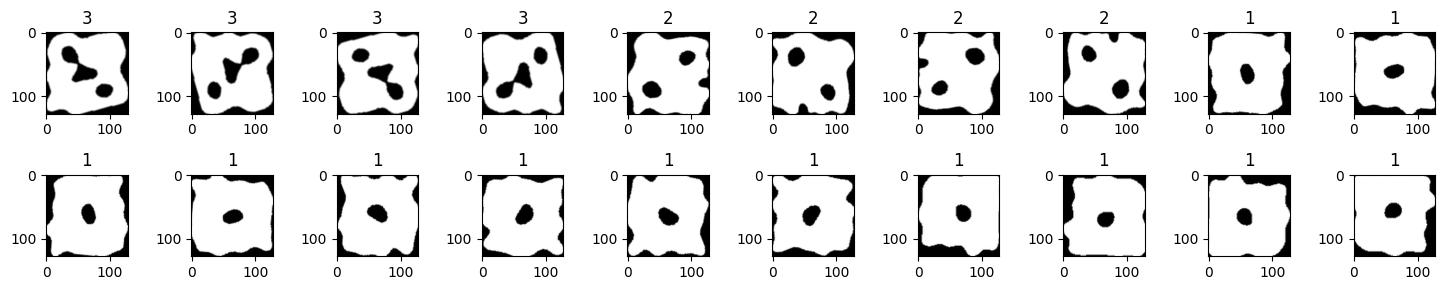

In [11]:
# 可視化
n = 20
fig = plt.figure(figsize=(15, 15*((n//10)/10)))
for i in range(n):
    ax = fig.add_subplot(n//10, 10, i+1)
    plt.imshow(imgs_x4[i], cmap='gray')
    plt.title(labels_x4[i])
    plt.tight_layout()